# Census income
## Budowa modeli

## 1. Importowanie danych

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer

from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

Skorzystamy z danych po pre-processingu wykonanego w pliku **01_EDA.ipynb**.

In [3]:
data = pd.read_csv ('census_income_dataset_processed.csv')
data = data.drop('Unnamed: 0', axis=1)
data

,income_level,age,workclass,education_num,sex,capital_gain,capital_loss,hours_per_week,race_Black,race_White,race_other,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native_country_Mexico,native_country_United-States,native_country_other
0,0,39,6,13,1,2174.0,0.0,40.0,False,True,False,False,True,False,False,False,False,False,True,False
1,0,50,5,13,1,0.0,0.0,13.0,False,True,False,True,False,False,False,False,False,False,True,False
2,0,38,3,9,1,0.0,0.0,40.0,False,True,False,False,True,False,False,False,False,False,True,False
3,0,53,3,7,1,0.0,0.0,40.0,True,False,False,True,False,False,False,False,False,False,True,False
4,0,28,3,13,0,0.0,0.0,40.0,True,False,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,39,3,13,0,0.0,0.0,36.0,False,True,False,False,True,False,False,False,False,False,True,False
48838,0,64,3,9,1,0.0,0.0,40.0,True,False,False,False,False,True,False,False,False,False,True,False
48839,0,38,3,13,1,0.0,0.0,50.0,False,True,False,True,False,False,False,False,False,False,True,False
48840,0,44,3,13,1,5455.0,0.0,40.0,False,False,True,False,False,False,True,False,False,False,True,False


## 2. Podział danych

In [4]:
from sklearn.model_selection import train_test_split

y = data["income_level"]
X = data.drop("income_level", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=420, train_size=0.7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  random_state=420, train_size=0.7)

## 3. Tworzenie modeli

Przetestowaliśmy kilka modeli: 

##### SVC

In [5]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train).score(X_test, y_test)

0.8007234013512591

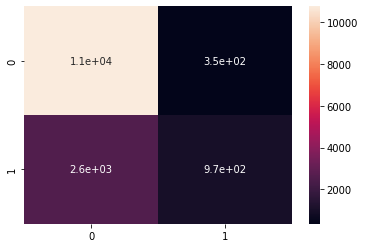

In [6]:
y_pred = clf.predict(X_test)
# y_pred

from sklearn import metrics

plt.figure()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.show()

##### Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train).score(X_test, y_test)

0.8424213471644032

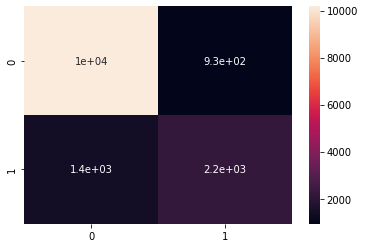

In [8]:
y_pred = rf.predict(X_test)

plt.figure()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.show()

##### XGBoost

In [9]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective="binary:logistic", seed = 42, use_label_encoder=False)
xgb.fit(X_train, y_train).score(X_test, y_test)

0.8625537432607657

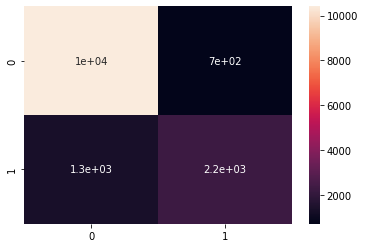

In [10]:
y_pred = xgb.predict(X_test)

plt.figure()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.show()

##### Dummy Classifier

In [11]:
from sklearn.dummy import DummyClassifier
dc_model = DummyClassifier(strategy="most_frequent")
dc_model.fit(X_train, y_train).score(X_test, y_test)

0.7582065106121614

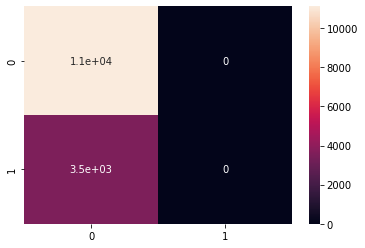

In [12]:
y_pred = dc_model.predict(X_test)

plt.figure()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.show()

##### Logisitc Regression

In [13]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state=420,n_jobs=-1)
LR_model.fit(X_train, y_train).score(X_test, y_test)

0.8157373916604108

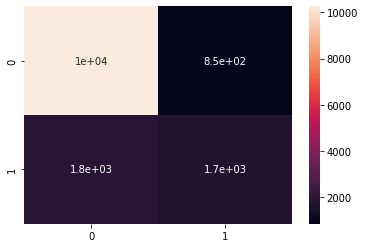

In [14]:
y_pred = LR_model.predict(X_test)

plt.figure()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.show()

Spośród wybranych modeli na razie najlepiej wypadł XGBoost.

# Dogłębna analiza modeli i inżynieria cech

### Model bazowy, do którego będziemy się porównywać

In [15]:
xgb = XGBClassifier(objective="binary:logistic", seed = 42, use_label_encoder=False)
xgb.fit(X_train, y_train).score(X_test, y_test)

0.8625537432607657

### Wstępna inżynieria cech i modele

In [21]:
[f for f in cat_features if f not in X_train.columns]

['race',
 'native_country',
 'Husband',
 'Not-in-family',
 'Other-relative',
 'Own-child',
 'Unmarried',
 'Wife']

In [22]:
X_train.columns

Index(['age', 'workclass', 'education_num', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'race_Black', 'race_White',
       'race_other', 'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'native_country_Mexico',
       'native_country_United-States', 'native_country_other'],
      dtype='object')

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

cat_features = ['age', 'workclass', 'education_num', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week'
                #'race', 'native_country', 'Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife'
                ]

base_transformer = ColumnTransformer(
    [
    ("onehot", OneHotEncoder(handle_unknown = 'ignore'), cat_features)        # one hot encoding
    ],
    remainder = "passthrough"
)


base_models = [("LR_model", LogisticRegression(random_state=420,n_jobs=-1)),
               ("SVM_model", SVC(random_state=42)),
               ("DT_model", DecisionTreeClassifier(random_state=420)),
               ("RF_model", RandomForestClassifier(random_state=420, n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=420, n_jobs=-1))]

kfolds = 8
split = KFold(n_splits=kfolds, shuffle=True, random_state=420)

base_results = []
names = []

for name, model in base_models:
    model_steps = Pipeline(
                           [('transformer', base_transformer),
                            ('model', model)]
                          )
    
    cv_results = cross_val_score(model_steps, 
                                 X_train, y_train,
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)

    base_results.append(cv_results)
    names.append(name)
    
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) \t min: {min_score}, max: {max_score}")

LR_model cross validation accuarcy score: 0.8674 +/- 0.0042 (std) 	 min: 0.8606, max: 0.8736
SVM_model cross validation accuarcy score: 0.8621 +/- 0.0046 (std) 	 min: 0.8569, max: 0.8717
DT_model cross validation accuarcy score: 0.8325 +/- 0.0044 (std) 	 min: 0.8268, max: 0.8395
RF_model cross validation accuarcy score: 0.848 +/- 0.0038 (std) 	 min: 0.8432, max: 0.8529
XGB_model cross validation accuarcy score: 0.8646 +/- 0.0035 (std) 	 min: 0.8606, max: 0.8717


Widzimy, że najlepiej poradziły sobie XGBoost oraz regresja logistyczna. Ze względu na szybkość trenowania się modeli, przy dalszej inżynierii cech będziemy sprawdzać, jak wprowadzane zmiany wpływają na skuteczność właśnie modelu regresji logistycznej. Na końcu sprawdzimy również, czy uda nam się w ten sposób poprawić działanie XGBoosta.

#### Skalowanie zmiennych

Wiedząc o tym, że modele regresji "nie lubią" nieprzeskalowanych danych, dokonamy teraz skalowania danych numerycznych. Wykorzystamy do tego standaryzację dla zmiennej wieku (przypomina ona bowiem - co naturalne - rozkład normalny) oraz normalizację min-max dla pozostałych cech, które nie mają takiej własności.

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

cat_features = ['age', 'workclass', 'education_num', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week'
                #'race', 'native_country', 'Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife'
                ]


transformer = ColumnTransformer(
    [
    ("onehot", OneHotEncoder(handle_unknown = 'ignore'), cat_features), 
    ("minmax_scaler", MinMaxScaler(), ["capital_gain", "capital_loss", "hours_per_week"]),
            #skalowanie
    ("std_scaler", StandardScaler(), ["age"])
    ],
    remainder = "passthrough"
)


lr = LogisticRegression(random_state=42, n_jobs=-1)

lr_model = Pipeline(
    [
        ('transformer', transformer),
        ('logistic-model', lr)
    ]
)

cv_results = cross_val_score(lr_model, 
                 X_train, y_train, 
                 cv=split,
                 scoring="accuracy",
                 n_jobs=-1)
    
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
    
print(f"LR_model with features scaling cross validation accuarcy score: {mean_score} +/- {std_dev} (std) \t min: {min_score}, max: {max_score}")

LR_model with features scaling cross validation accuarcy score: 0.8675 +/- 0.0046 (std) 	 min: 0.8603, max: 0.8736


`LR_model cross validation accuarcy score: 0.8593 +/- 0.0043 (std) 	 min: 0.8509, max: 0.8671`

Przeskalowanie zmiennych niewiele zmieniło wynik regresji logistycznej.

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

cat_features = ['age', 'workclass', 'education_num', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week'
                #'race', 'native_country', 'Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife'
                ]


transformer = ColumnTransformer(
    [
    ("onehot", OneHotEncoder(handle_unknown = 'ignore'), cat_features), 
    ("std_scaler", StandardScaler(), ["age", "capital_gain", "capital_loss", "hours_per_week"])
    ],
    remainder = "passthrough"
)


lr = LogisticRegression(random_state=42, n_jobs=-1)

lr_model = Pipeline(
    [
        ('transformer', transformer),
        ('logistic-model', lr)
    ]
)

cv_results = cross_val_score(lr_model, 
                 X_train, y_train, 
                 cv=split,
                 scoring="accuracy",
                 n_jobs=-1)
    
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
    
print(f"LR_model with features scaling cross validation accuarcy score: {mean_score} +/- {std_dev} (std) \t min: {min_score}, max: {max_score}")

LR_model with features scaling cross validation accuarcy score: 0.8683 +/- 0.0042 (std) 	 min: 0.8623, max: 0.8746


`LR_model cross validation accuarcy score: 0.8593 +/- 0.0043 (std) 	 min: 0.8509, max: 0.8671`

Użycie standard scalera na wszystkich zmiennych dało nieco lepsze wyniki, ale znacznej róznicy nie ma.